In [1]:
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers as optimizers
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

h:\Anaconda\envs\NLP\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
h:\Anaconda\envs\NLP\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
h:\Anaconda\envs\NLP\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
h:\Anaconda\envs\NLP\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [3]:
# Set the paths to your training and test data directories
train_dir = 'train/'
test_dir = 'test/' 

In [4]:
# Set the image dimensions and number of classes
input_shape = (48, 48, 1)
img_width, img_height = 48, 48
output_class  = 7  # Replace with the actual number of emotion classes

In [6]:
# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=128,
                                                    color_mode="grayscale",                                            
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=128,
                                                  color_mode="grayscale",
                                                  class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
model = Sequential()
# convolutional layers
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

optimizer = optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 46, 46, 256)       2560      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 23, 23, 256)       0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 23, 23, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 512)       1180160   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 512)       0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 10, 10, 512)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 512)         2359808   
__________

In [13]:
early_stopping = EarlyStopping(monitor = 'val_acc',patience=10)

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.samples // train_generator.batch_size,
                              epochs=100,
                              validation_data=test_generator,
                              validation_steps=test_generator.samples // test_generator.batch_size,
                              callbacks=[early_stopping]
                             )

Epoch 1/100
224/224 [==============================] - 101s 453ms/step - loss: 1.8262 - acc: 0.2460 - val_loss: 1.8127 - val_acc: 0.2471
Epoch 2/100
224/224 [==============================] - 101s 450ms/step - loss: 1.8033 - acc: 0.2496 - val_loss: 1.7930 - val_acc: 0.2522
Epoch 3/100
224/224 [==============================] - 133s 593ms/step - loss: 1.7173 - acc: 0.2922 - val_loss: 1.5983 - val_acc: 0.3740
Epoch 4/100
224/224 [==============================] - 140s 624ms/step - loss: 1.5756 - acc: 0.3782 - val_loss: 1.4207 - val_acc: 0.4441
Epoch 5/100
224/224 [==============================] - 101s 449ms/step - loss: 1.4614 - acc: 0.4333 - val_loss: 1.3215 - val_acc: 0.4971
Epoch 6/100
224/224 [==============================] - 101s 450ms/step - loss: 1.3953 - acc: 0.4654 - val_loss: 1.3109 - val_acc: 0.5003
Epoch 7/100
224/224 [==============================] - 101s 449ms/step - loss: 1.3517 - acc: 0.4824 - val_loss: 1.2240 - val_acc: 0.5326
Epoch 8/100
224/224 [====================

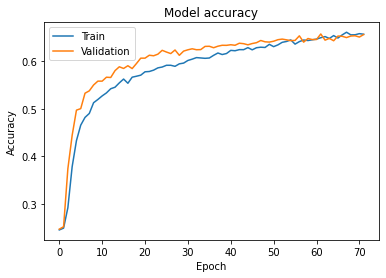

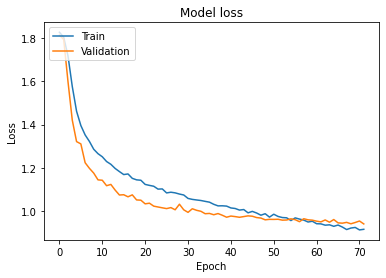

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.9408006817102432
Test Accuracy: 0.6556919642857143


In [9]:
y_pred = model.predict_generator(test_generator, steps=test_generator.samples // test_generator.batch_size)

In [10]:
y_pred

array([[6.32287702e-05, 5.66776803e-09, 6.30370399e-04, ...,
        4.36650887e-02, 1.38226213e-04, 3.07303723e-02],
       [3.46609712e-01, 1.03711174e-03, 5.87282293e-02, ...,
        3.73843938e-01, 2.16189355e-01, 2.35518906e-03],
       [1.19062681e-02, 1.23839136e-02, 1.39240865e-02, ...,
        1.78056881e-02, 6.83718454e-03, 3.41853523e-03],
       ...,
       [1.53480731e-02, 1.06416201e-05, 2.13929974e-02, ...,
        5.89118481e-01, 3.71660173e-01, 1.32619301e-04],
       [1.63532287e-01, 6.77443761e-03, 1.31818116e-01, ...,
        3.91378403e-01, 2.44594887e-01, 6.01854408e-03],
       [8.27326905e-03, 1.58562267e-04, 8.70233774e-02, ...,
        6.94990857e-04, 2.59065977e-03, 8.98375273e-01]], dtype=float32)

In [12]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [30]:
y_pred_labels

array([4, 0, 4, ..., 5, 4, 3], dtype=int64)

In [22]:
y_true_labels = test_generator.classes[:y_pred_labels.shape[0]]

In [23]:
y_true_labels

array([0, 0, 0, ..., 6, 6, 6])

In [24]:
y_true_labels.shape,y_pred_labels.shape

((7168,), (7168,))

In [35]:
class_names = list(test_generator.class_indices.keys())
classification_rep = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

       angry       0.14      0.13      0.13       958
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.08      0.10      1024
       happy       0.24      0.24      0.24      1774
     neutral       0.17      0.24      0.20      1233
         sad       0.17      0.18      0.17      1247
    surprise       0.13      0.14      0.13       821

    accuracy                           0.18      7168
   macro avg       0.14      0.14      0.14      7168
weighted avg       0.17      0.18      0.17      7168



In [16]:
# Save the model
model.save('emotion_model_cnn_final.h5')

In [7]:
# Load the saved model
from keras.models import load_model
model = load_model('emotion_model_cnn_final.h5')

## <font color='green'> Making Predictions on Test images </font>

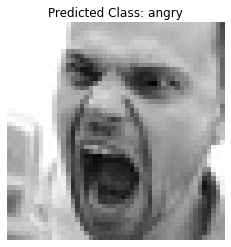

In [30]:
from keras.preprocessing import image
import numpy as np
import cv2

# Load and preprocess the input image
image_path = 'test/angry/PrivateTest_1221822.jpg'
img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img = img / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction on the input image
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Map the predicted label to class name
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())
predicted_class_name = class_names[predicted_label]

# Display the input image and predicted class name
plt.imshow(np.squeeze(img), cmap='gray')
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_name)
plt.show()


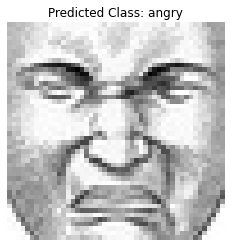

In [16]:
# Load and preprocess the input image
image_path = 'test/disgust/PublicTest_57583458.jpg'
img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img = img / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction on the input image
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Map the predicted label to class name
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())
predicted_class_name = class_names[predicted_label]

# Display the input image and predicted class name
plt.imshow(np.squeeze(img), cmap='gray')
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_name)
plt.show()


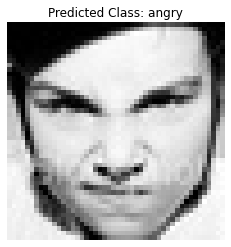

In [21]:
# Load and preprocess the input image
image_path = 'test/angry/PrivateTest_31103368.jpg'
img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img = img / 255.0  # Normalize pixel values to [0, 1]

# Make a prediction on the input image
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Map the predicted label to class name
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())
predicted_class_name = class_names[predicted_label]

# Display the input image and predicted class name
plt.imshow(np.squeeze(img), cmap='gray')
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_name)
plt.show()
